**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#To ensure the charts created are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
#Defining path
path= r'/Users/prateeksharma/Documents/House prices'

In [4]:
df=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','df_clean.pkl'))

In [1]:
#Viewing column names
df.columns

NameError: name 'df' is not defined

**Picking variables from the data set suitable for exploratory visual analysis**

In [6]:
#Creating a subset including variables suitable for analysis
sub=df[['Price', 'Number_Beds', 'Number_Baths','Population', 'Median_Family_Income']]

In [7]:
sub

,Price,Number_Beds,Number_Baths,Population,Median_Family_Income
0,779900,3,2,5647656,97000
1,799999,3,1,5647656,97000
2,799900,2,2,5647656,97000
3,1200000,4,2,5647656,97000
4,668800,1,1,5647656,97000
...,...,...,...,...,...
35763,439900,2,2,431479,86753
35764,6990000,5,5,431479,86753
35765,419900,2,2,431479,86753
35766,949900,3,1,431479,86753


In [8]:
#Checking correlation
sub.corr()

,Price,Number_Beds,Number_Baths,Population,Median_Family_Income
Price,1.000000,0.327880,0.464330,0.075395,0.060080
Number_Beds,0.327880,1.000000,0.712988,-0.099070,0.069099
Number_Baths,0.464330,0.712988,1.000000,-0.080935,0.127826
Population,0.075395,-0.099070,-0.080935,1.000000,0.134970
Median_Family_Income,0.060080,0.069099,0.127826,0.134970,1.000000


### Creating a correlation matrix heatmap

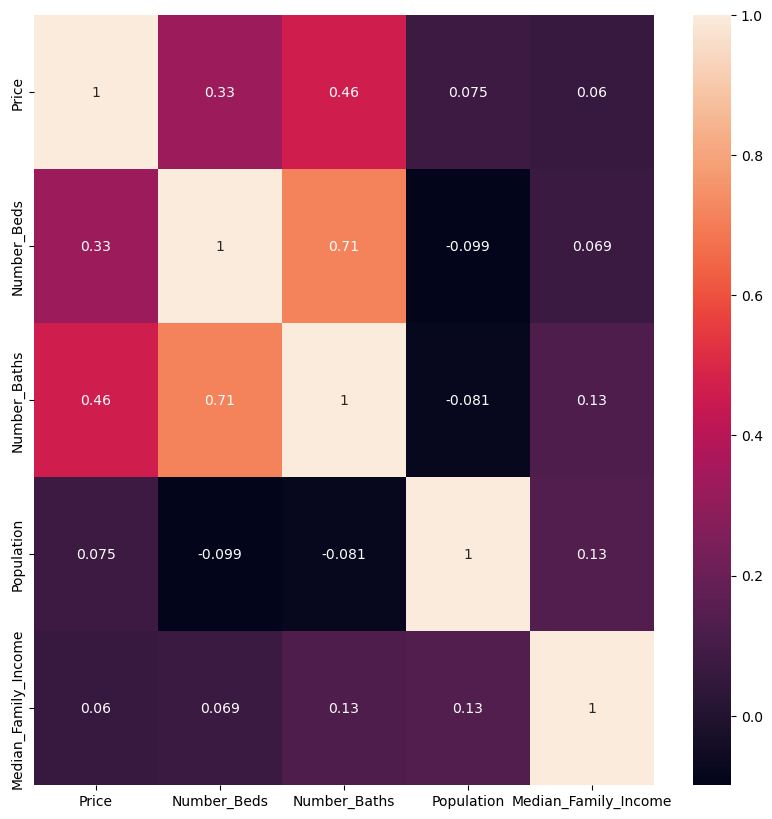

In [9]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation matrix heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
g1 = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.
#Export viz
g1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Heatmap Matrix.png'))

As per the matrix, the strongest relationship shown on the heatmap is between the number of bedrooms and bathrooms, which is expected as larger homes tend to have more of both. The relationships among the other variables are comparitively weaker.

### Scatterplot

/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


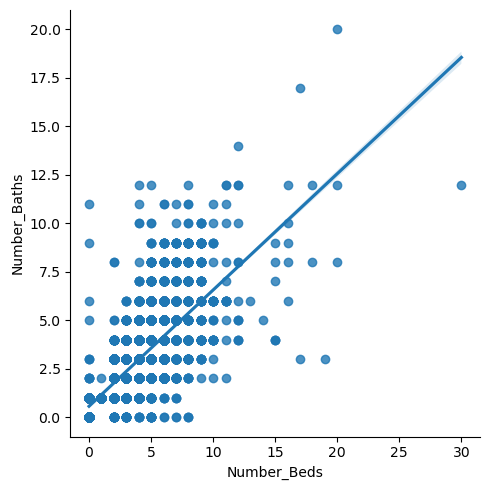

In [11]:
# Create a scatterplot for the "house age" and "price per unit" columns in seaborn
g2=sns.lmplot(x = 'Number_Beds', y = 'Number_Baths', data = sub)
#Export viz
g2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Scatterplot- Bed n Bath.png'))

It indicates that there is a positive correlation between the number of beds and the number of baths; as the number of beds increases, the number of baths tends to increase as well.

### Pair plot

/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

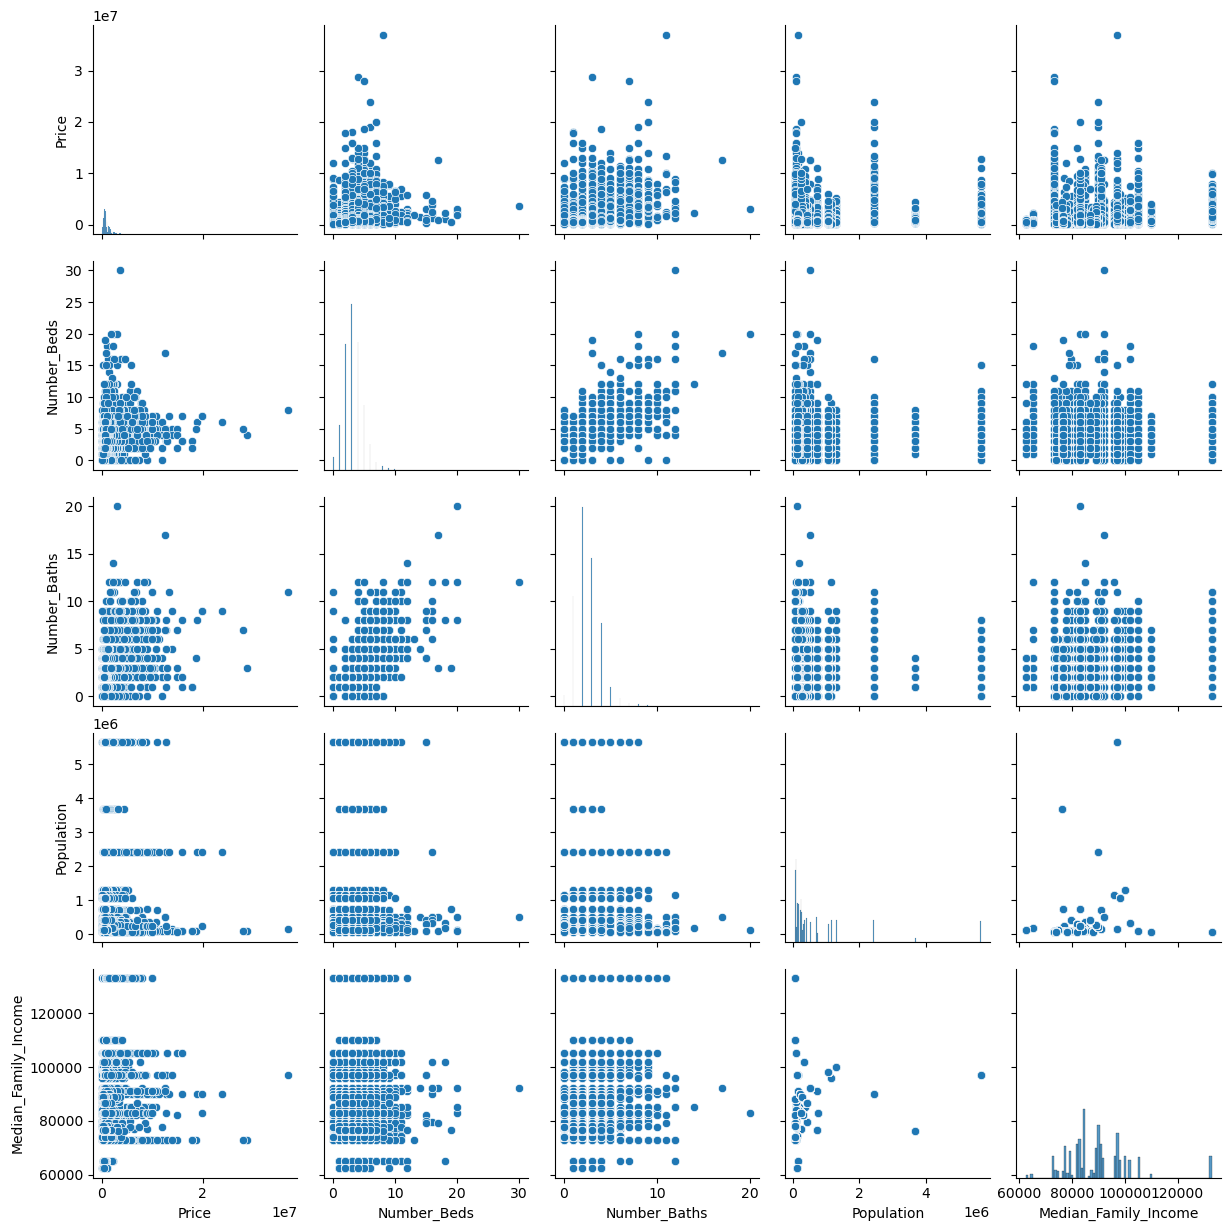

In [12]:
# Create a pair plot 
g3 = sns.pairplot(sub)
#Export viz
g3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Pair Plot.png'))

Based on this pair plot, relationships among most of these variables are not very strong but there seems to be a noticeable positive relationship between number_beds and number_baths assuming typically bigger houses would have more of both and also Price and number_bers and number_baths shows a positive correlation.

### Categorical plot

/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


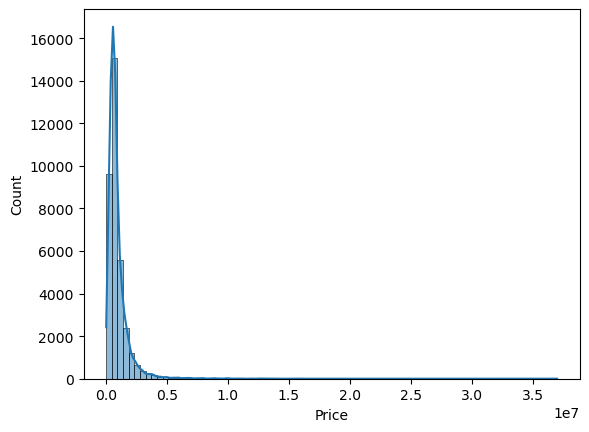

In [13]:
#Using a histogram to visualize the distribution of the price variable. 
# The argument "kde" adds a line that encompasses the distribution

cat1=sns.histplot(sub['Price'], bins = 80, kde = True)
#Export viz
cat1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Price hist.png'))

Its not very informative however it does tells us that a majority of the house prices are under half a million dollars. I'll create a price flag to show smaller increments to make it more interpretable. 

In [14]:
#Creating Price Flag
df.loc[sub['Price'] < 500000, 'Price_flag'] = 'Low price'

In [15]:
df.loc[(sub['Price'] >= 500000) & (sub['Price'] < 1000000), 'Price_flag'] = 'Average price' 

In [16]:
df.loc[(sub['Price'] >=1000000), 'Price_flag']= 'High price'

In [17]:
df['Price_flag'].value_counts(dropna = False)

Price_flag
Average price    15474
Low price        10640
High price        9645
Name: count, dtype: int64

/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


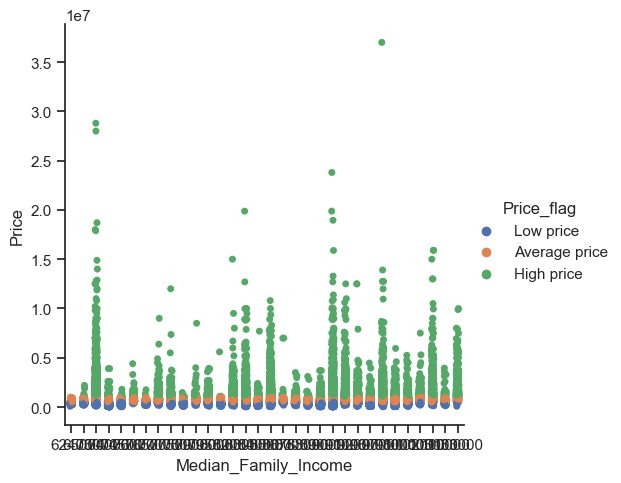

In [18]:
# Create a categorical plot in seaborn using the price categories created above
sns.set(style="ticks")
g4 = sns.catplot(x="Median_Family_Income", y="Price", hue="Price_flag", data=df)
#Export viz
g4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Price n median Income'))

the output on X axis is a bit cluttered and hard to tell which income group are we talking about. It would need a refined structure.

/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


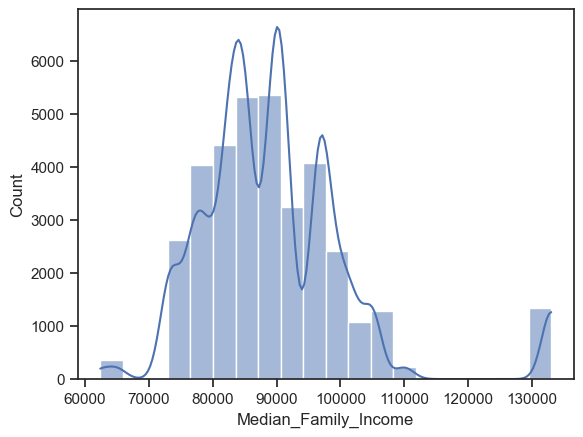

In [19]:
#Using a histogram to visualize the distribution of the Median_Family_Income variable. 
cat2=sns.histplot(sub['Median_Family_Income'], bins = 20, kde = True)
#Export viz
cat2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Median Family income.png'))

In [20]:
#Creating Median family income Flag
df.loc[sub['Median_Family_Income'] < 80000, 'Income_flag'] = 'Low Income'

In [21]:
df.loc[(sub['Median_Family_Income'] >= 80000) & (sub['Median_Family_Income'] < 100000), 'Income_flag'] = 'Mid Income'

In [22]:
df.loc[(sub['Median_Family_Income'] >=100000), 'Income_flag'] = 'High Income'

In [23]:
df['Income_flag'].value_counts(dropna = False)

Income_flag
Mid Income     23650
Low Income      6862
High Income     5247
Name: count, dtype: int64

/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


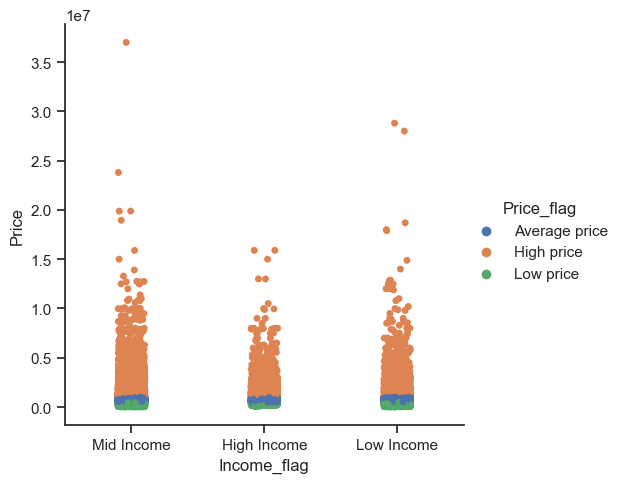

In [24]:
# Create a categorical plot in seaborn using the price categories created above
sns.set(style="ticks")
cat3 = sns.catplot(x="Income_flag", y="Price", hue="Price_flag", data=df)
#Export viz
cat3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Price n Income flag.png'))

In [25]:
#Creating Median family Population Category Flag
df.loc[sub['Population'] < 300000, 'Population_category'] = '<300K'

In [26]:
df.loc[(sub['Population'] >= 300000) & (sub['Population'] < 500000), 'Population_category'] = '<500K'

In [27]:
df.loc[(sub['Population'] >= 500000) & (sub['Population'] < 1000000), 'Population_category'] = '<1M'

In [28]:
df.loc[sub['Population'] >= 1000000, 'Population_category'] = '>=1M'

In [29]:
df['Population_category'].value_counts(dropna = False)

Population_category
<300K    21400
>=1M      6586
<500K     4562
<1M       3211
Name: count, dtype: int64

/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


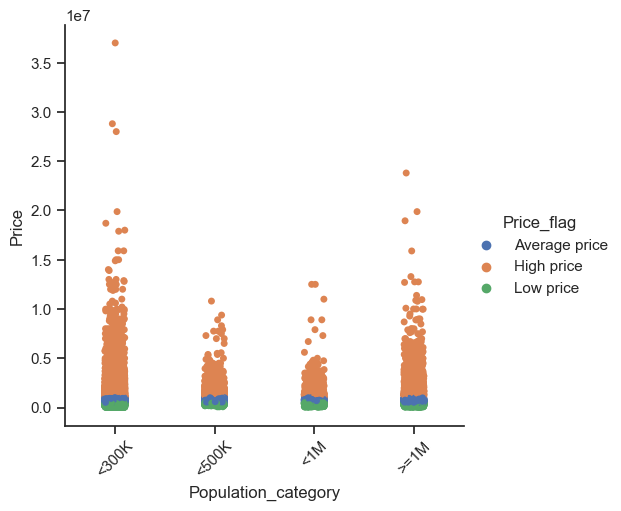

In [30]:
# Create a categorical plot in seaborn using the price categories created above

# Defining the order for the x-axis categories based on population count in ascending order
x_order = ["<300K", "<500K","<1M",">=1M"]

sns.set(style="ticks")
# Create the categorical plot
cat4 = sns.catplot(x="Population_category", y="Price", hue="Price_flag", data=df, order=x_order)
cat4.set_xticklabels(rotation=45)
plt.show()
#Export viz
cat4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Price n Population.png'))

Based on the analysis, population doesnt seem to have much effect on the house prices.

/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


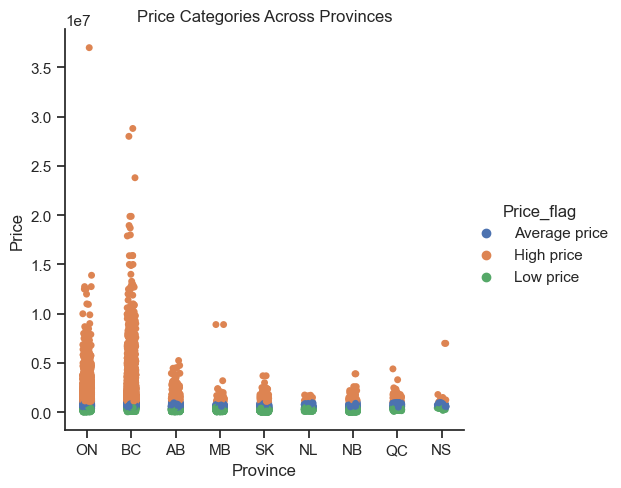

In [31]:
# Converting full province names to their short forms
province_mapping = {
    'Ontario': 'ON',
    'Alberta': 'AB',
    'British Columbia': 'BC',
    'Saskatchewan': 'SK',
    'Newfoundland and Labrador': 'NL',
    'New Brunswick': 'NB',
    'Quebec': 'QC',
    'Manitoba': 'MB',
    'Nova Scotia': 'NS'
}

# Map the full province names to short forms using the dictionary
df['Province_short'] = df['Province'].map(province_mapping)

# Creating a categorical plot in seaborn using the short province names
sns.set(style="ticks")
cat8 = sns.catplot(x="Province_short", y="Price", hue="Price_flag", data=df)
plt.xlabel('Province')
plt.ylabel('Price')
plt.title('Price Categories Across Provinces')
plt.show()
#Export viz
cat8.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Price n Province.png'))

ON and BC have the highest house prices among all provinces and NS has the lowest house prices. 

/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


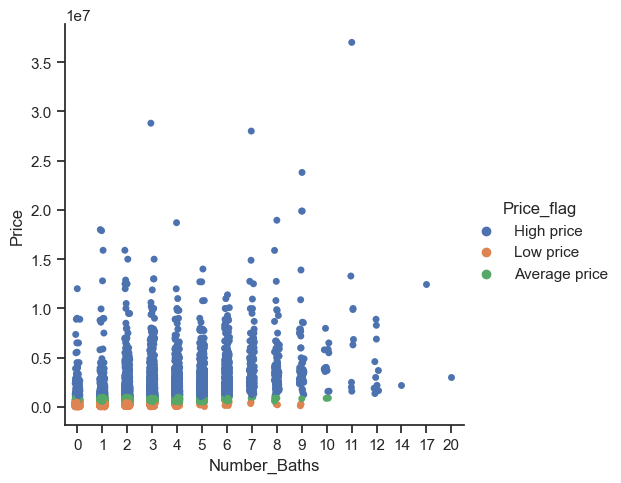

In [32]:
# Create a categorical plot in seaborn using the price categories created above
sns.set(style="ticks")
cat5 = sns.catplot(x="Number_Baths", y="Price", hue="Price_flag", data=df)
#Export viz
cat5.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Price n baths.png'))

/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


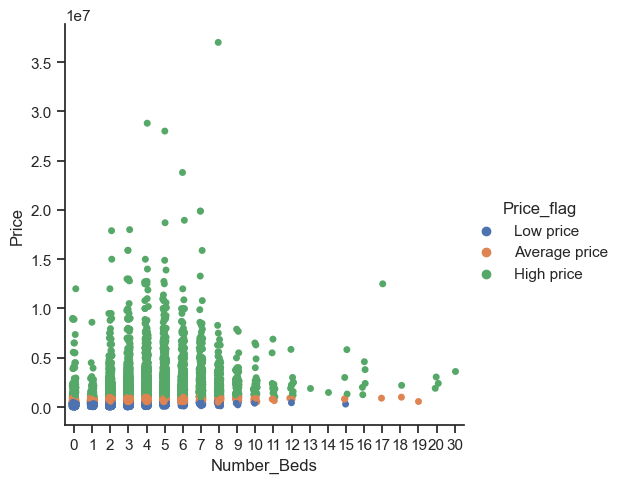

In [33]:
# Define the order for the hue variable
hue_order = ["Low price", "Average price", "High price"]
# Set the style
sns.set(style="ticks")
# Create the categorical plot
cat6 = sns.catplot(x="Number_Beds", y="Price", hue="Price_flag", data=df, hue_order=hue_order)
plt.show()
#Export viz
cat6.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Price n Beds.png'))

/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


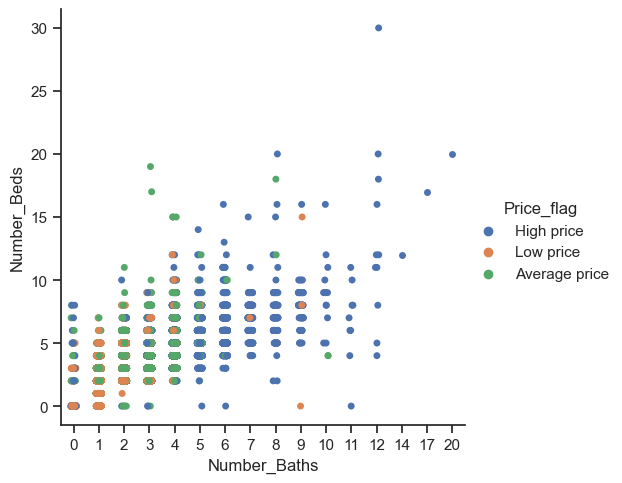

In [34]:
# Create a categorical plot in seaborn using the price categories created above
sns.set(style="ticks")
cat7 = sns.catplot(x="Number_Baths", y="Number_Beds", hue="Price_flag", data=df)
#Export viz
cat7.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Baths n Beds.png'))

Most of the data points are clustered around properties with fewer bathrooms, with a high concentration of properties having 1 to 5 bathrooms. As the number of bathrooms increases, the number of bedrooms also tends to increase, which suggests a positive correlation between the number of bathrooms and bedrooms.There are a few outliers, such as a property with 59 bathrooms, which is an unusual number and significantly higher than the rest of the data but i'll be keeping them. 

***Hypothesis***

- Houses with a higher number of bedrooms will also have a higher number of bathrooms.
- Property prices are higher in areas with higher median family incomes.
- There is a positive correlation between the price of a property and its number of bedrooms and bathrooms.

In [36]:
#Exporting dataset
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Exploring relationships.pkl'))